In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import tree, metrics
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [101]:
df = pd.read_csv(r'/Users/tanvimehta/Desktop/Springboard Data Science/BankruptcyPrediction/bankruptcydata.csv', sep='\s*,\s*')

<ipython-input-101-0f5a8d4440a7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r'/Users/tanvimehta/Desktop/Springboard Data Science/BankruptcyPrediction/bankruptcydata.csv', sep='\s*,\s*')


In [102]:
# Test-Train Split
X=df.drop('Bankrupt?', axis=1)
y=df['Bankrupt?']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [104]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5285904156026463

In [105]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1311    2]
 [  51    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



In [106]:
# Create the classifier: Scaler and logreg
scaler = StandardScaler()
logreg = LogisticRegression()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, logreg)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the pipeline of the test set: y_pred
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8901781580873018

In [107]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1306    7]
 [  40   11]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.22      0.32        51

    accuracy                           0.97      1364
   macro avg       0.79      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [108]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.970
Accuracy score (validation): 0.963

Learning rate:  0.1
Accuracy score (training): 0.972
Accuracy score (validation): 0.964

Learning rate:  0.25
Accuracy score (training): 0.974
Accuracy score (validation): 0.966

Learning rate:  0.5
Accuracy score (training): 0.976
Accuracy score (validation): 0.960

Learning rate:  0.75
Accuracy score (training): 0.965
Accuracy score (validation): 0.947

Learning rate:  1
Accuracy score (training): 0.964
Accuracy score (validation): 0.956



In [109]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_depth = 2, random_state = 0)
gb_fit = gb.fit(X_train, y_train)
y_pred = gb_fit.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.53      0.31      0.40        51

    accuracy                           0.96      1364
   macro avg       0.75      0.65      0.69      1364
weighted avg       0.96      0.96      0.96      1364

[[1299   14]
 [  35   16]]


In [111]:
# Decision Tree (Entropy). 
entr_model=tree.DecisionTreeClassifier(criterion='entropy', random_state=1234, max_depth=5)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred=entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1234)

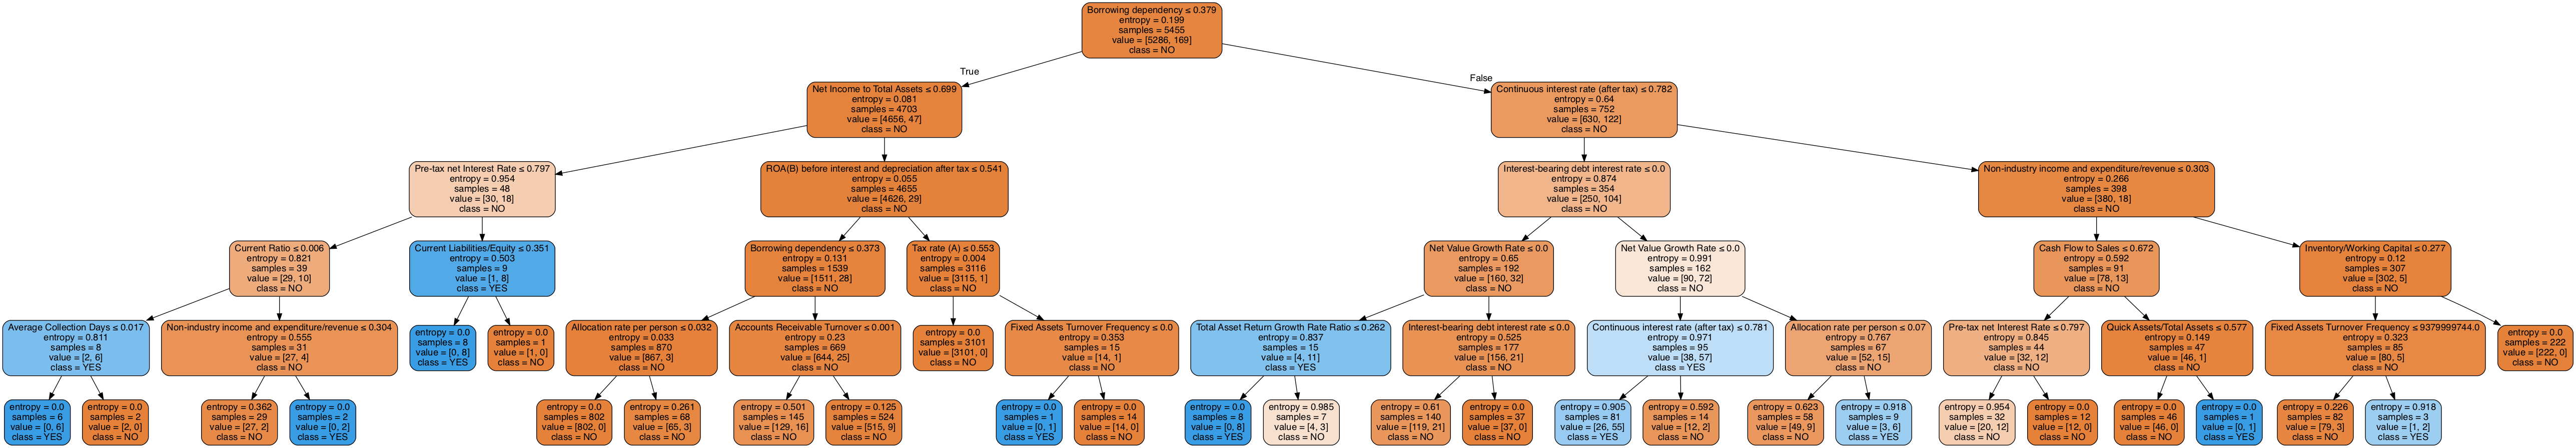

In [112]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [113]:
# Run this block for model evaluation metrics 
print("Model Entropy - max depth = 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('f1 score for "Yes"' , metrics.f1_score(y_test,y_pred, pos_label = 1))
print('f1 score for "No"' , metrics.f1_score(y_test,y_pred, pos_label = 0))

Model Entropy - max depth = 5
Accuracy: 0.9655425219941349
Balanced accuracy: 0.6617161716171617
Precision score for "Yes" 0.5666666666666667
Precision score for "No" 0.974512743628186
Recall score for "Yes" 0.3333333333333333
Recall score for "No" 0.9900990099009901
f1 score for "Yes" 0.4197530864197531
f1 score for "No" 0.9822440498677748


In [114]:
# pip install imbalanced-learn

In [115]:
# pip install delayed

In [116]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

Counter({0: 6599, 1: 220})
Counter({0: 6599, 1: 220})


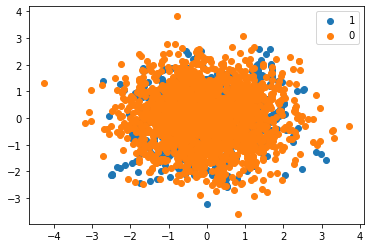

In [117]:
# SMOTE - Synthetic Minority Oversampling Technique 
# define dataset
Xn, yn = make_classification(n_samples=10000, n_features=95, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
Xn, yn = pipeline.fit_resample(Xn, yn)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(yn == label)[0]
    pyplot.scatter(Xn[row_ix, 0], Xn[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

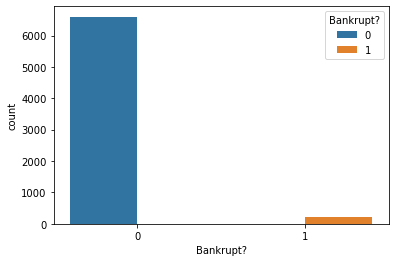

In [118]:
sns.countplot(x='Bankrupt?', data=df, hue='Bankrupt?')

In [119]:
# Logistic Regression 
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.2, random_state=42)

In [120]:
# Create the classifier: Scaler and logreg
scaler = StandardScaler()
logreg = LogisticRegression()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, logreg)

# Fit the pipeline to the training data
pipeline.fit(Xn_train, yn_train)

# Predict the pipeline of the test set: y_pred
y_pred = pipeline.predict(Xn_test)
y_pred_prob = pipeline.predict_proba(Xn_test)[:,1]
roc_auc_score(yn_test, y_pred_prob)

0.9894518718246389

In [121]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(yn_test, y_pred))
print(classification_report(yn_test, y_pred))

[[373  14]
 [ 15 192]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       387
           1       0.93      0.93      0.93       207

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



In [122]:
# Decision Tree (Entropy). 
entr_model=tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)

# Call fit() on entr_model
entr_model.fit(Xn_train, yn_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred=entr_model.predict(Xn_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [123]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

In [124]:
dt = DecisionTreeClassifier()
dt.fit(Xn_train, yn_train)

DecisionTreeClassifier()

In [125]:

feat_importance = dt.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))


feat importance = [0.00000000e+00 7.21500722e-04 0.00000000e+00 7.75807227e-04
 5.61167228e-04 6.31313131e-04 0.00000000e+00 0.00000000e+00
 5.61167228e-04 4.20875421e-04 4.47089947e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.22222222e-03 8.35384279e-03
 0.00000000e+00 8.13830443e-03 6.31313131e-04 2.83956262e-03
 4.51559131e-03 0.00000000e+00 7.31799931e-03 4.20875421e-04
 0.00000000e+00 3.11349507e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.76431388e-03 2.14263851e-03 2.76883657e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.61167228e-04 1.46116193e-03 0.00000000e+00 1.96829351e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.23824149e-03 0.00000000e+00 7.27513228e-03
 0.00000000e+00 4.53745072e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.35656121e-04 1.27701948e-03 4.05645379e-03
 3.48883573e-03 0.00000000e+00 0.00000000e+00 8.31628863e-04
 2.268

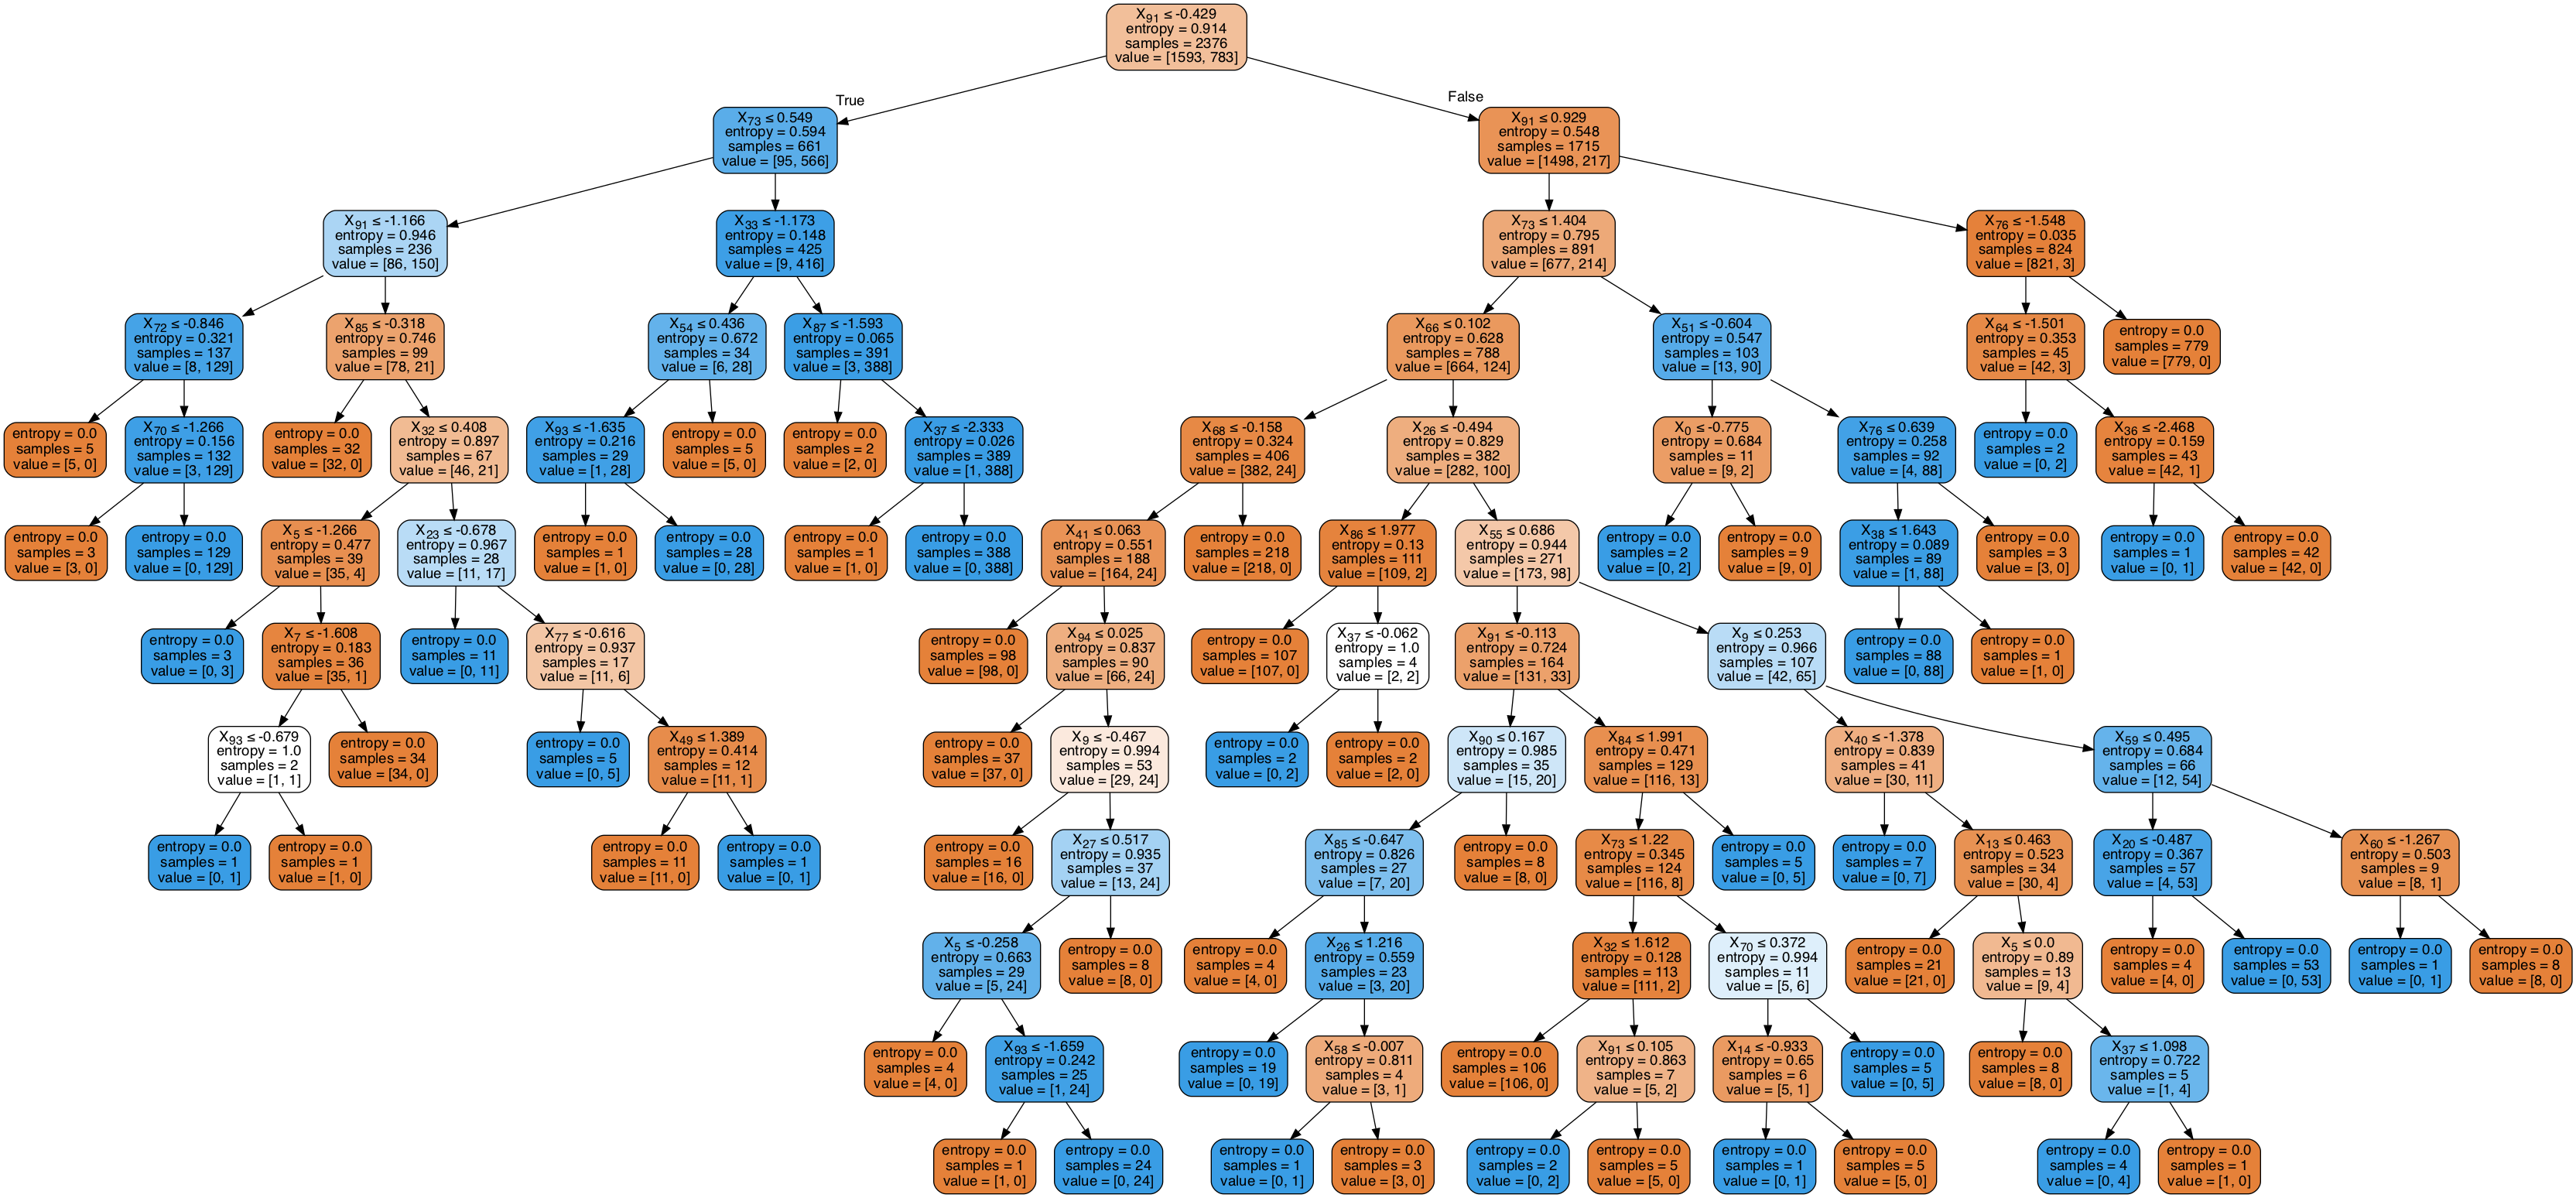

In [126]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [127]:
# Run this block for model evaluation metrics 
print("Model Entropy - No max depth")
print("Accuracy:", metrics.accuracy_score(yn_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(yn_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(yn_test,y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(yn_test,y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(yn_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(yn_test,y_pred, pos_label = 0))
print('f1 score for "Yes"' , metrics.f1_score(yn_test,y_pred, pos_label = 1))
print('f1 score for "No"' , metrics.f1_score(yn_test,y_pred, pos_label = 0))

Model Entropy - No max depth
Accuracy: 0.9461279461279462
Balanced accuracy: 0.9418042916526232
Precision score for "Yes" 0.9186602870813397
Precision score for "No" 0.961038961038961
Recall score for "Yes" 0.927536231884058
Recall score for "No" 0.9560723514211886
f1 score for "Yes" 0.9230769230769231
f1 score for "No" 0.9585492227979275


In [128]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, random_state = 0)
    gb.fit(Xn_train, yn_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(Xn_train, yn_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(Xn_test, yn_test)))

Learning rate:  0.05
Accuracy score (training): 0.933
Accuracy score (validation): 0.918
Learning rate:  0.1
Accuracy score (training): 0.953
Accuracy score (validation): 0.923
Learning rate:  0.25
Accuracy score (training): 0.983
Accuracy score (validation): 0.944
Learning rate:  0.5
Accuracy score (training): 0.997
Accuracy score (validation): 0.953
Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (validation): 0.951
Learning rate:  1
Accuracy score (training): 0.997
Accuracy score (validation): 0.960


In [132]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, random_state = 0)
gb_fit = gb.fit(Xn_train, yn_train)
y_pred = gb_fit.predict(Xn_test)

In [133]:
print(classification_report(yn_test, y_pred))
print(confusion_matrix(yn_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       387
           1       0.92      0.94      0.93       207

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594

[[371  16]
 [ 12 195]]


In [134]:
# pip install xgboost

In [135]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(Xn_train, yn_train)
# make predictions for test data
y_pred = clf.predict(Xn_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:04:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [136]:
print(classification_report(yn_test, y_pred))
print(confusion_matrix(yn_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       387
           1       0.96      0.97      0.96       207

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

[[378   9]
 [  7 200]]


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

In [138]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=47)
)

In [139]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, Xn_train, yn_train, cv=5)

In [140]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.9894958 , 0.98315789, 0.97894737, 0.97263158, 0.98315789])

In [141]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

{'randomforestclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [142]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [143]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(Xn_train, yn_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': [10, 12, 16,
                                                                  20, 26, 33,
                                                                  42, 54, 69,
                                                                  88, 112, 143,
                                                                  183, 233, 297,
                                                                  379, 483, 615,
                                                                  784, 1000],
                         'standardscaler': [StandardScaler(), None]})

In [144]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 297,
 'standardscaler': StandardScaler()}

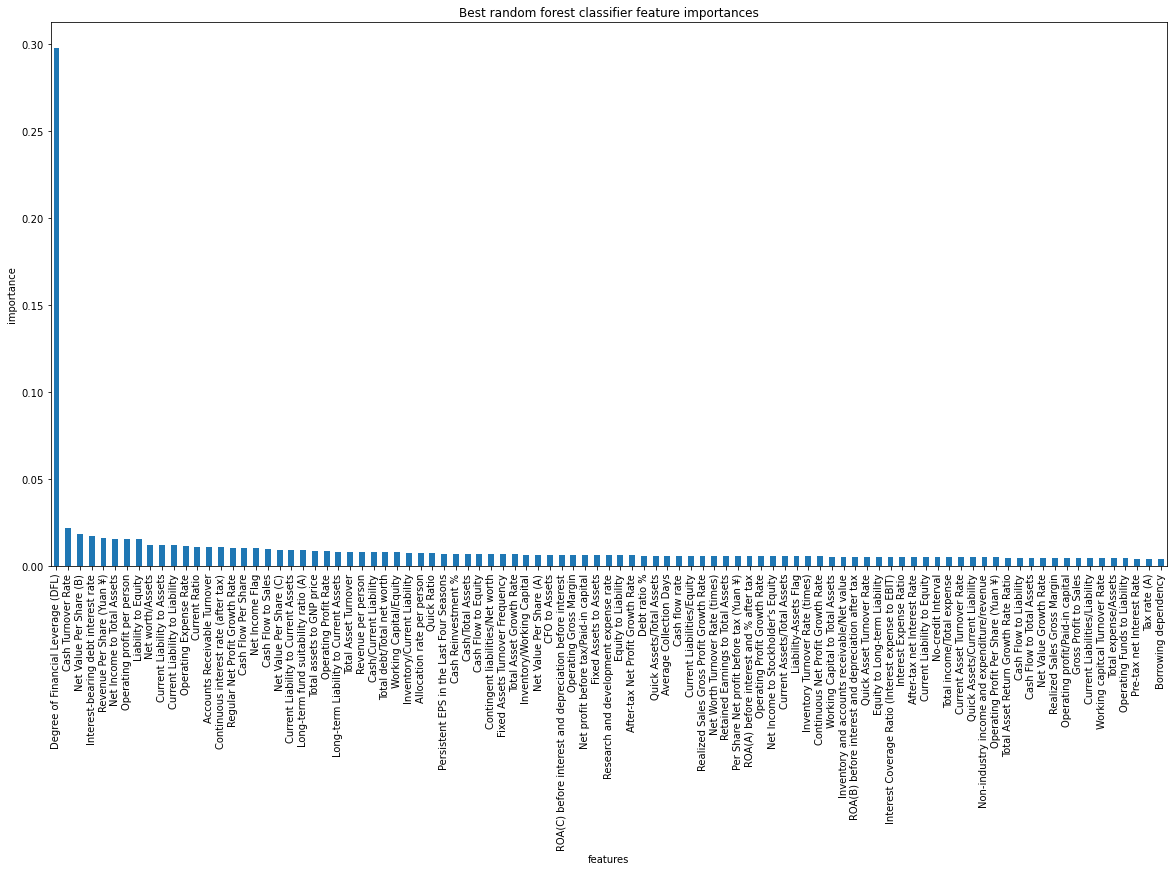

In [98]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(20, 10))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');
